In [79]:
# import the modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
#======================
# STEP 1:  COLLECT DATA
#======================

# import data for 6 months
tripdata_2023_07 = pd.read_csv("/Users/oleksiirastorhuiev/Desktop/tripdata_2023_07.csv") 
tripdata_2023_08 = pd.read_csv("/Users/oleksiirastorhuiev/Desktop/tripdata_2023_08.csv") 
tripdata_2023_09 = pd.read_csv("/Users/oleksiirastorhuiev/Desktop/tripdata_2023_09.csv") 
tripdata_2023_10 = pd.read_csv("/Users/oleksiirastorhuiev/Desktop/tripdata_2023_10.csv") 
tripdata_2023_11 = pd.read_csv("/Users/oleksiirastorhuiev/Desktop/tripdata_2023_11.csv") 
tripdata_2023_12 = pd.read_csv("/Users/oleksiirastorhuiev/Desktop/tripdata_2023_12.csv") 

In [81]:
#========================================
# STEP 2: COMBINE DATA INTO A SINGLE FILE
#========================================

# combine data sets into a new one
tripdata_combined = pd.concat([tripdata_2023_07, tripdata_2023_08, tripdata_2023_09, tripdata_2023_10, tripdata_2023_11, tripdata_2023_12], ignore_index=True)

In [82]:
#======================================================
# STEP 3: CLEANING UP AND ADDING DATA TO PREPARE FOR ANALYSIS
#======================================================

# There are  several tasks that we will need to solve:

# (1) We need more flexible data aggregation, not only by type of user. Therefore, add some additional column: day, month, year
# (2) Add an new calculated field for trip duration.
# (4) For quality control reasons, we will delete rides in new column duration with negative values, several hundred
# rides where bikes took out of circulation.

# retrieve the first 5 rows
tripdata_combined.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [83]:
# Info about dataframe
tripdata_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329418 entries, 0 to 3329417
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 330.2+ MB


In [84]:
# add a new column duration of trips
tripdata_combined['duration'] = ''
tripdata_combined.head()



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,


In [85]:
# Convert object data (started_at, endet_at, duratiom) to datetime dataset

tripdata_combined['started_at'] = pd.to_datetime(tripdata_combined['started_at'])


In [86]:
tripdata_combined['ended_at'] = pd.to_datetime(tripdata_combined['ended_at'])


In [87]:
tripdata_combined['duration'] = pd.to_datetime(tripdata_combined['duration'])

In [128]:
tripdata_combined['duration'] = tripdata_combined['ended_at'] - tripdata_combined['started_at']
tripdata_combined['duration'] 


In [200]:
# Add columns that list the date, month, day, and year of each ride
tripdata_combined['date'] = tripdata_combined['started_at'].dt.date
tripdata_combined['month'] = tripdata_combined['started_at'].dt.month
tripdata_combined['month_name'] = tripdata_combined['started_at'].dt.month_name()
tripdata_combined['hour'] = tripdata_combined['started_at'].dt.hour
tripdata_combined['day'] = tripdata_combined['started_at'].dt.day_of_week
tripdata_combined['day_name'] = tripdata_combined['started_at'].dt.day_name()
tripdata_combined['year'] = tripdata_combined['started_at'].dt.year

In [201]:
tripdata_combined.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,date,month,day,year,day_name,month_name,hour
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,...,-87.653041,member,0 days 00:16:30,2023-07-23,7,6,2023,Sunday,July,20
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,...,-87.648384,member,0 days 00:13:30,2023-07-23,7,6,2023,Sunday,July,17
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,...,-87.677692,member,0 days 00:09:36,2023-07-23,7,6,2023,Sunday,July,10
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,...,-87.641190,member,0 days 00:04:56,2023-07-21,7,4,2023,Friday,July,8
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,...,-87.638181,member,0 days 00:11:26,2023-07-08,7,5,2023,Saturday,July,15


In [202]:
# statistical summary will help to see some inconviniences
tripdata_combined.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration,month,day,year,hour
count,3329418,3329418,3.329418e+06,3.329418e+06,3.324888e+06,3.324888e+06,3329418,3.329418e+06,3.329418e+06,3329418.0,3.329418e+06
mean,2023-09-12 01:02:17.538466048,2023-09-12 01:20:59.477243648,4.190329e+01,-8.764683e+01,4.190365e+01,-8.764705e+01,0 days 00:18:41.938778188,8.888081e+00,3.054698e+00,2023.0,1.409457e+01
min,2023-07-01 00:00:00,2023-07-01 00:01:26,4.163000e+01,-8.794000e+01,0.000000e+00,-8.799000e+01,-12 days +10:23:29,7.000000e+00,0.000000e+00,2023.0,0.000000e+00
25%,2023-08-03 12:21:58.500000,2023-08-03 12:43:21.249999872,4.188101e+01,-8.766000e+01,4.188103e+01,-8.766000e+01,0 days 00:05:35,8.000000e+00,1.000000e+00,2023.0,1.100000e+01
50%,2023-09-06 09:55:46.500000,2023-09-06 10:14:24.500000,4.189964e+01,-8.764395e+01,4.190000e+01,-8.764410e+01,0 days 00:09:46,9.000000e+00,3.000000e+00,2023.0,1.500000e+01
75%,2023-10-16 13:55:02.500000,2023-10-16 14:09:40,4.193000e+01,-8.762990e+01,4.193125e+01,-8.762991e+01,0 days 00:17:13,1.000000e+01,5.000000e+00,2023.0,1.800000e+01
max,2023-12-31 23:59:38,2024-01-01 23:50:51,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,68 days 09:29:04,1.200000e+01,6.000000e+00,2023.0,2.300000e+01
std,NaN,NaN,4.462816e-02,2.699655e-02,5.032657e-02,5.519921e-02,0 days 03:21:35.054028581,1.531040e+00,1.966244e+00,0.0,4.983590e+00


In [203]:
# size of dataframe
tripdata_combined.shape

(3329418, 21)

In [204]:
#=====================================
# STEP 4: DESCRIPTIVE ANALYSIS
#=====================================

# statistical summary
tripdata_combined.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration,month,day,year,hour
count,3329418,3329418,3.329418e+06,3.329418e+06,3.324888e+06,3.324888e+06,3329418,3.329418e+06,3.329418e+06,3329418.0,3.329418e+06
mean,2023-09-12 01:02:17.538466048,2023-09-12 01:20:59.477243648,4.190329e+01,-8.764683e+01,4.190365e+01,-8.764705e+01,0 days 00:18:41.938778188,8.888081e+00,3.054698e+00,2023.0,1.409457e+01
min,2023-07-01 00:00:00,2023-07-01 00:01:26,4.163000e+01,-8.794000e+01,0.000000e+00,-8.799000e+01,-12 days +10:23:29,7.000000e+00,0.000000e+00,2023.0,0.000000e+00
25%,2023-08-03 12:21:58.500000,2023-08-03 12:43:21.249999872,4.188101e+01,-8.766000e+01,4.188103e+01,-8.766000e+01,0 days 00:05:35,8.000000e+00,1.000000e+00,2023.0,1.100000e+01
50%,2023-09-06 09:55:46.500000,2023-09-06 10:14:24.500000,4.189964e+01,-8.764395e+01,4.190000e+01,-8.764410e+01,0 days 00:09:46,9.000000e+00,3.000000e+00,2023.0,1.500000e+01
75%,2023-10-16 13:55:02.500000,2023-10-16 14:09:40,4.193000e+01,-8.762990e+01,4.193125e+01,-8.762991e+01,0 days 00:17:13,1.000000e+01,5.000000e+00,2023.0,1.800000e+01
max,2023-12-31 23:59:38,2024-01-01 23:50:51,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,68 days 09:29:04,1.200000e+01,6.000000e+00,2023.0,2.300000e+01
std,NaN,NaN,4.462816e-02,2.699655e-02,5.032657e-02,5.519921e-02,0 days 03:21:35.054028581,1.531040e+00,1.966244e+00,0.0,4.983590e+00


In [205]:
# statistical calculations
average_duration = tripdata_combined['duration'].mean()
average_duration_casual = tripdata_combined[tripdata_combined['member_casual'] == 'casual']['duration'].mean()
average_duration_member = tripdata_combined[tripdata_combined['member_casual'] == 'member']['duration'].mean()
max_duration = tripdata_combined['duration'].max()
min_duration = tripdata_combined['duration'].min()
median_duration = tripdata_combined['duration'].median()
mode_duration = tripdata_combined['duration'].mode()

print(f'Results of statistical calculations: \n average trip duration is: {average_duration},\n average trip duration for casual rider: {average_duration_casual}, \n average trip duration for member rider: {average_duration_member}, \n longest trip: {max_duration}, \n shortest trip: {min_duration}, \n most common trip duration: {mode_duration}, \n middle value of trip duration: {median_duration}')

Results of statistical calculations: 
 average trip duration is: 0 days 00:18:41.938778188,
 average trip duration for casual rider: 0 days 00:28:38.265009445, 
 average trip duration for member rider: 0 days 00:12:51.998143134, 
 longest trip: 68 days 09:29:04, 
 shortest trip: -12 days +10:23:29, 
 most common trip duration: 0   0 days 00:04:52
Name: duration, dtype: timedelta64[ns], 
 middle value of trip duration: 0 days 00:09:46


In [206]:
# Creating in csv file to find the reason of negatives values in duration of trip
# tripdata_combined.to_csv("/Users/oleksiirastorhuiev/Desktop/capstone_combined/tripdata_problem.csv",encoding='utf-8', index=False)

In [207]:
tripdata_combined.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
duration              timedelta64[ns]
date                           object
month                           int32
day                             int32
year                            int32
day_name                       object
month_name                     object
hour                            int32
dtype: object

In [208]:
# remove negative values from duration column
df_filtered = tripdata_combined[tripdata_combined['duration'] > pd.Timedelta(0)]
df_filtered.head(5)



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,date,month,day,year,day_name,month_name,hour
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,...,-87.653041,member,0 days 00:16:30,2023-07-23,7,6,2023,Sunday,July,20
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,...,-87.648384,member,0 days 00:13:30,2023-07-23,7,6,2023,Sunday,July,17
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,...,-87.677692,member,0 days 00:09:36,2023-07-23,7,6,2023,Sunday,July,10
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,...,-87.641190,member,0 days 00:04:56,2023-07-21,7,4,2023,Friday,July,8
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,...,-87.638181,member,0 days 00:11:26,2023-07-08,7,5,2023,Saturday,July,15


In [209]:
df_filtered.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration,month,day,year,hour
count,3328365,3328365,3.328365e+06,3.328365e+06,3.323835e+06,3.323835e+06,3328365,3.328365e+06,3.328365e+06,3328365.0,3.328365e+06
mean,2023-09-12 01:01:47.332099072,2023-09-12 01:20:31.235879680,4.190329e+01,-8.764683e+01,4.190365e+01,-8.764704e+01,0 days 00:18:43.903780384,8.888064e+00,3.054672e+00,2023.0,1.409472e+01
min,2023-07-01 00:00:00,2023-07-01 00:01:26,4.163000e+01,-8.794000e+01,0.000000e+00,-8.799000e+01,0 days 00:00:01,7.000000e+00,0.000000e+00,2023.0,0.000000e+00
25%,2023-08-03 12:20:17,2023-08-03 12:41:54,4.188101e+01,-8.766000e+01,4.188103e+01,-8.766000e+01,0 days 00:05:36,8.000000e+00,1.000000e+00,2023.0,1.100000e+01
50%,2023-09-06 09:55:42,2023-09-06 10:14:13,4.189964e+01,-8.764395e+01,4.190000e+01,-8.764410e+01,0 days 00:09:46,9.000000e+00,3.000000e+00,2023.0,1.500000e+01
75%,2023-10-16 13:54:28,2023-10-16 14:08:52,4.193000e+01,-8.762990e+01,4.193125e+01,-8.762991e+01,0 days 00:17:14,1.000000e+01,5.000000e+00,2023.0,1.800000e+01
max,2023-12-31 23:59:38,2024-01-01 23:50:51,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,68 days 09:29:04,1.200000e+01,6.000000e+00,2023.0,2.300000e+01
std,NaN,NaN,4.462577e-02,2.699405e-02,5.032607e-02,5.520465e-02,0 days 03:20:38.320957920,1.531051e+00,1.966231e+00,0.0,4.983274e+00


In [210]:
import seaborn as sns


In [212]:
# statistical calculations 
average_duration = df_filtered['duration_min'].mean()
average_duration_casual = df_filtered[df_filtered['member_casual'] == 'casual']['duration_min'].mean()
average_duration_member = df_filtered[df_filtered['member_casual'] == 'member']['duration_min'].mean()
max_duration = df_filtered['duration_min'].max()
min_duration = df_filtered['duration_min'].min()
median_duration = df_filtered['duration_min'].median()
mode_duration = df_filtered['duration_min'].mode()

print(f'the average of riding time is: {average_duration:.2f}')
print(f'the average riding time of member riders is: {average_duration_member:.2f}')
print(f'the average riding time of casual riders is: {average_duration_casual:.2f}')

the average of riding time is: 18.73
the average riding time of member riders is: 12.89
the average riding time of casual riders is: 28.69


Text(0.5, 1.0, 'Outliers for trip duration in minutes')

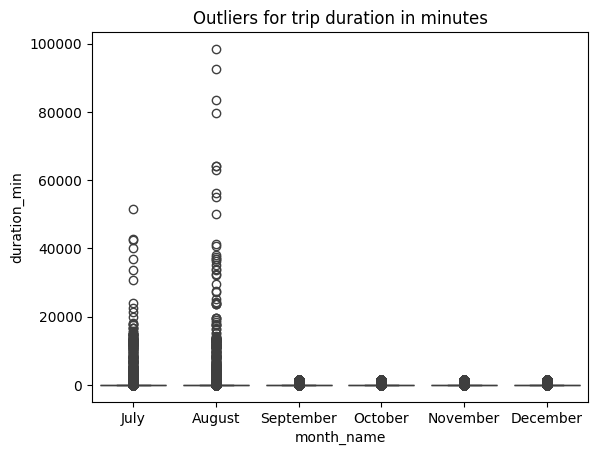

In [276]:
# vizualise outliers for duration in minutes
sns.boxplot(data=df_filtered, x='month_name', y='duration_min' ).set_title('Outliers for trip duration in minutes')

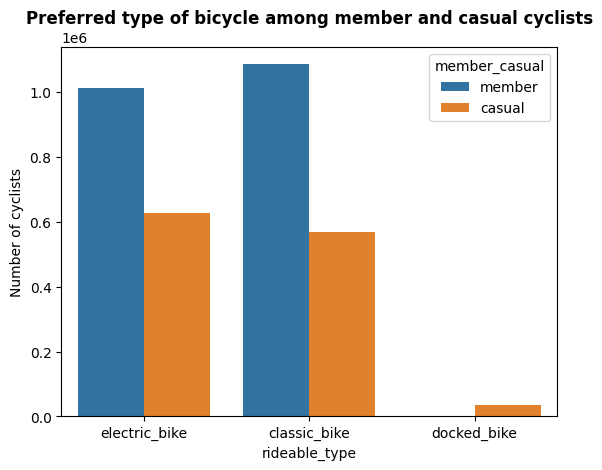

In [214]:
sns.countplot(data=df_filtered, 
              x='rideable_type', 
              hue='member_casual')
plt.title('Preferred type of bicycle among member and casual cyclists',fontweight='bold')
plt.ylabel ('Number of cyclists')
plt.show()

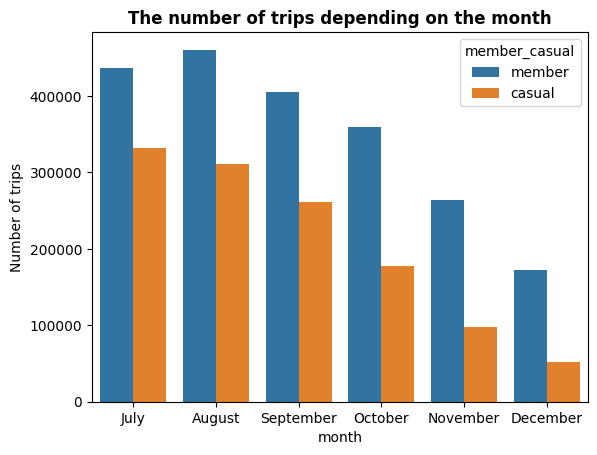

In [215]:
#Numer of trips per month 
ax = sns.countplot(data=df_filtered,
    x='month_name', 
    hue='member_casual',
    order=["July", "August", "September", "October", "November", "December"])  
plt.title('The number of trips depending on the month',fontweight='bold')
plt.ylabel ('Number of trips')
plt.xlabel('month')
plt.show()

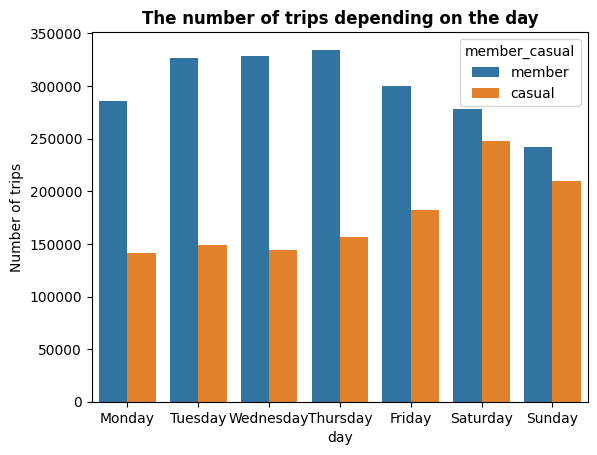

In [216]:
#Plot the graph
ax = sns.countplot(data=df_filtered,
    x='day_name', 
    hue='member_casual',
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title('The number of trips depending on the day',fontweight='bold')
plt.ylabel ('Number of trips')
plt.xlabel('day')
plt.show()

In [217]:
# 10 most popular start stations among member and casual users

# firstly we need to perform data aggregation (counts for each group)
member_start = df_filtered[df_filtered['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
casual_start = df_filtered[df_filtered['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)

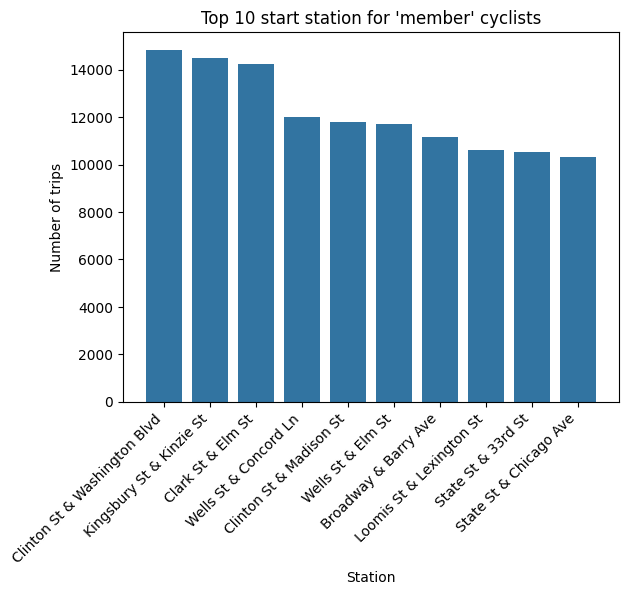

In [273]:
# Top 10 for member cyclists
plt.bar(member_start.index,member_start,
        color = '#3274A1')
plt.xticks(rotation = 45, ha='right')
plt.title("Top 10 start station for 'member' cyclists")
plt.xlabel('Station')
plt.ylabel('Number of trips')
plt.show()

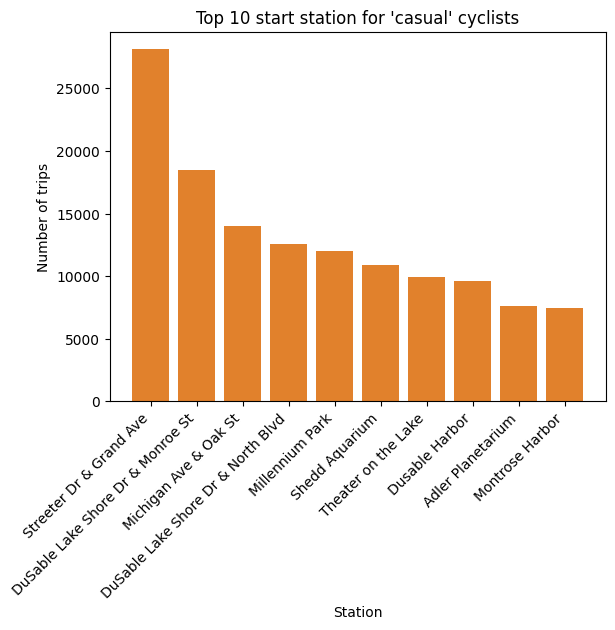

In [275]:
# Top 10 for casual cyclists
plt.bar(casual_start.index,casual_start,
        color = '#E1812C')
plt.xticks(rotation = 45, ha='right')
plt.title("Top 10 start station for 'casual' cyclists")
plt.xlabel('Station')
plt.ylabel('Number of trips')
plt.show()

In [240]:
# Heatmaps for member and casual cyclists

# Create a pivot table for the data related to member cyclist

pt_mem = pd.pivot_table(
    df_filtered,
    values='member_casual',
    index='hour',
    columns=['day_name'],
    aggfunc=(lambda x: sum(x=='member'))
    
)
pt_mem 

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,2892,1960,5231,5863,2108,1629,1872
1,1547,943,3934,3870,985,730,925
2,828,629,2244,2409,530,450,444
3,619,504,1271,1345,416,353,364
4,765,663,699,1032,653,671,688
5,2868,3165,1302,1152,3489,3763,3676
6,9861,9943,3227,2586,10850,11561,11224
7,15605,17807,5684,4227,21146,22737,22449
8,18370,21320,10238,7146,25665,27094,27515


In [257]:
# A Pivot table for casual cyclist data
pt_cas = pd.pivot_table(
    df_filtered,
    values='member_casual',
    index='hour',
    columns='day_name',
    aggfunc=(lambda x: sum(x=='casual'))
)
pt_cas

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,2638,2187,5947,7204,1731,1638,1688
1,1746,1289,4753,4672,1003,872,941
2,849,674,2706,3152,647,583,592
3,532,533,1401,1614,369,341,365
4,436,455,716,1086,355,382,360
5,1045,1015,902,960,1011,1062,1018
6,4252,2406,1605,1505,2765,2811,2707
7,5570,4509,2781,2588,5213,5558,5524
8,6111,5545,5491,4412,6779,6884,7163


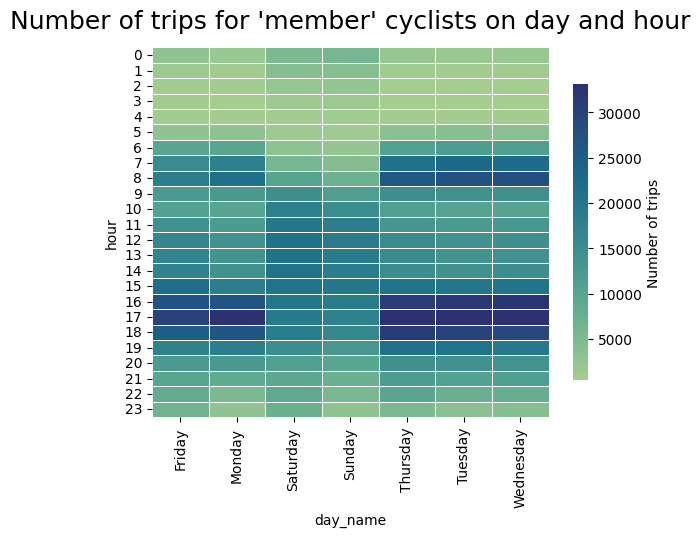

In [258]:
sns.heatmap(pt_mem, cmap='crest',
                 robust=True,
                 fmt='.2f',
                 annot=False,
                 linewidths=.5,
                 annot_kws={'size':11},
                 cbar_kws={'shrink':.8,
                           'label':'Number of trips'})
plt.title("Number of trips for 'member' cyclists on day and hour", fontdict={'fontsize':18},    pad=14);

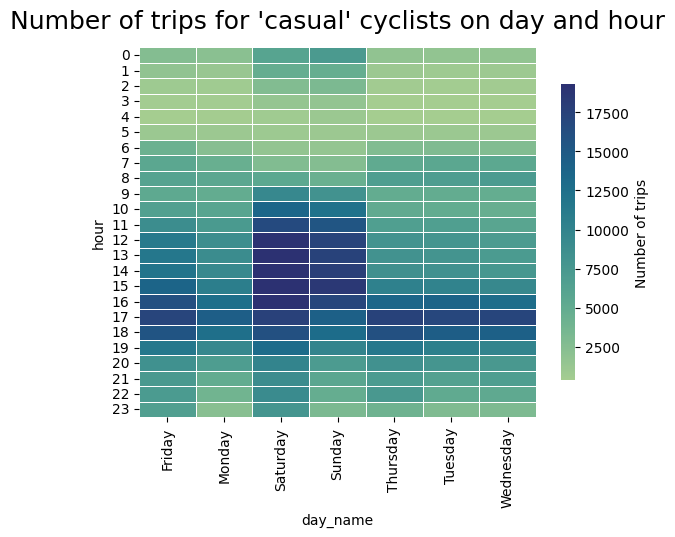

In [256]:
sns.heatmap(pt_cas, cmap='crest',
                 robust=True,
                 fmt='.2f',
                 annot=False,
                 linewidths=.5,
                 annot_kws={'size':11},
                 cbar_kws={'shrink':.8,
                           'label':'Number of trips'})
plt.title("Number of trips for 'casual' cyclists on day and hour", fontdict={'fontsize':18},    pad=14);

In [ ]:
# Export in csv file
df_filtered.to_csv("/Users/oleksiirastorhuiev/Desktop/cyclistic_df_filtered.csv",encoding='utf-8', index=False)